In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("titanic_train-Copy1.csv.csv")
#data = pd.read_csv("titanic_test-Copy1.csv")

In [3]:
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

C:\Users\RAHUL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\RAHUL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


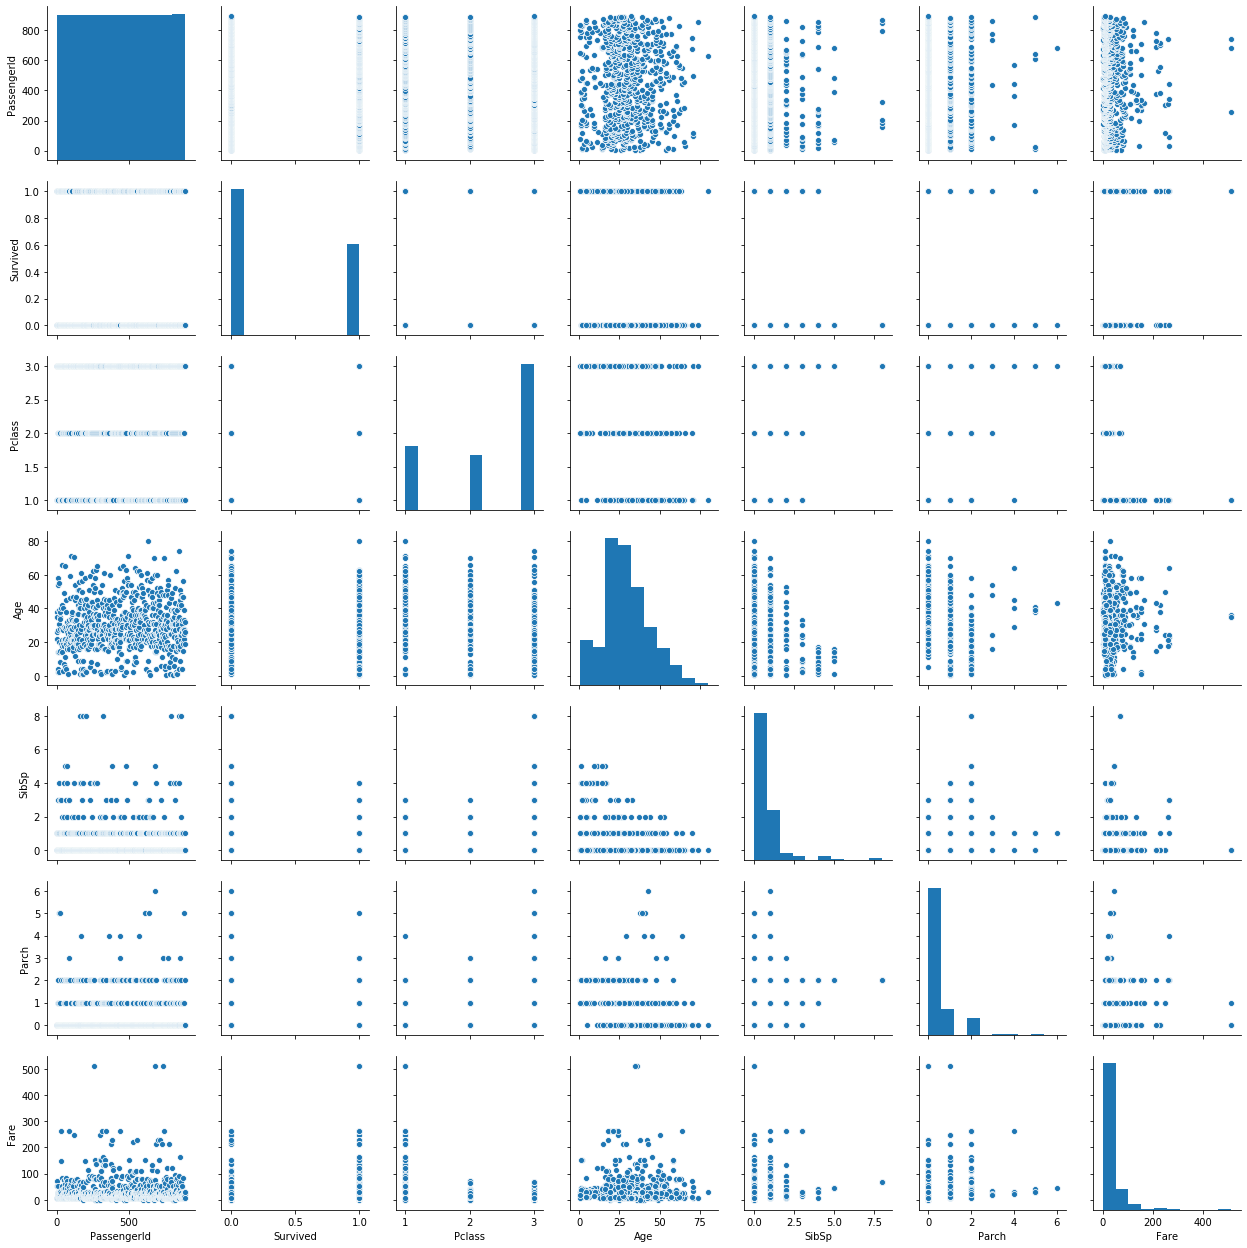

In [4]:
sns.pairplot(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
df['Age'].fillna(value = df['Age'].mean(),inplace=True)

In [10]:
df.Age = round(df.Age,0)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.drop('Cabin',inplace=True,axis=1)
data.drop('Cabin',inplace=True,axis=1)

NameError: name 'data' is not defined

In [ ]:
sns.countplot(x="Survived",data=df)

In [ ]:
sns.countplot(x = "Survived",data = df,hue = "Sex",palette = "Set2")

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
# finding the number of people survived and not survived
df['Survived'].value_counts()

In [ ]:
df['Sex'].value_counts()

In [ ]:
# making a count plot for "Sex" column
sns.countplot('Sex', data=df)

In [ ]:
# number of survivors Gender wise
sns.countplot('Sex', hue='Survived', data=df)

In [ ]:
# making a count plot for "Pclass" column
sns.countplot('Pclass', data=df)

In [ ]:
sns.countplot('Pclass', hue='Survived', data=df)

In [ ]:
df['Sex'].value_counts()

In [ ]:
df['Embarked'].value_counts()

In [ ]:

# converting categorical Columns

df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

df.head()

In [ ]:
X = df.drop(columns = ['PassengerId','Name','Ticket'],axis=1)#,'Ticket','Survived'
Y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

In [ ]:
X_train_prediction = logmodel.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

In [ ]:
X_test_prediction = logmodel.predict(X_test)

In [ ]:
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

- **Accuracy for this model** is (154+114) / (154+114+0+0) = 1